# ANALISIS EXPLORATORIO DE DATOS

## Lectura de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('../data/dataframe.csv',sep=',', encoding='latin-1', header=[0, 1], index_col=0, low_memory=False,)
df

FECHA               HORA   CAUDAL Cal 1ria        \
      Unnamed: 1_level_1 Unnamed: 2_level_1 Entr l/s      Kg. Dosis   
0               1/1/2013                  0      NaN      NaN   NaN   
1               1/1/2013                  1    545.0      NaN   NaN   
2               1/1/2013                  2    538.0      NaN   NaN   
3               1/1/2013                  3    516.0      NaN   NaN   
4               1/1/2013                  4    526.0      NaN   NaN   
...                  ...                ...      ...      ...   ...   
91270         31/12/2022                 20    600.0      NaN   NaN   
91271         31/12/2022                 21    620.0      NaN   NaN   
91272         31/12/2022                 22    620.0      NaN   NaN   
91273         31/12/2022                 23    510.0      NaN   NaN   
91274         31/12/2022                 24    500.0      NaN   NaN   

      AGUA CRUDA                                         COAGULANTE          \
             p.H  Color    NTU Alcalinidad Conductividad  Granulado Liquido   
0            NaN    NaN    NaN         NaN           NaN        NaN     NaN   
1            7.5    6.5    2.1         NaN           NaN        NaN     NaN   
2            NaN    NaN    NaN         NaN           NaN        NaN     NaN   
3            7.8    6.0    2.4         NaN           NaN        NaN     NaN   
4            NaN    NaN    NaN         NaN           NaN        NaN     NaN   
...          ...    ...    ...         ...           ...        ...     ...   
91270        7.4  425.0  657.0        25.0          55.5        NaN     NaN   
91271        7.5  321.0  404.0        25.0          55.7        NaN     NaN   
91272        7.3  322.0  402.0        25.0          55.4        NaN     NaN   
91273        7.4  300.0  390.0        25.0          55.5      650.0     NaN   
91274        6.9  110.0   73.4        28.0          58.1        NaN     NaN   

            AGUA TRATADA                              
      Dosis        Cloro Alcalinidad  p.H Color  NTU  
0       NaN          NaN         NaN  NaN   NaN  NaN  
1       NaN          1.2         NaN  6.8   2.8  0.7  
2       NaN          NaN         NaN  NaN   NaN  NaN  
3       NaN          1.2         NaN  6.9   3.0  0.6  
4       NaN          NaN         NaN  NaN   NaN  NaN  
...     ...          ...         ...  ...   ...  ...  
91270  40.0          1.5        17.0  6.6   2.0  1.1  
91271  40.0          NaN        17.0  6.5   2.0  1.1  
91272  40.0          1.6        13.0  6.6   2.0  1.4  
91273  40.0          1.5        14.0  6.8   2.0  1.2  
91274  40.0          1.5        17.0  6.9   2.0  1.2  

[91275 rows x 18 columns]


## Organización del DataFrame

In [3]:
#Nombre de las columnas
df.columns

MultiIndex([(       'FECHA', 'Unnamed: 1_level_1'),
            (        'HORA', 'Unnamed: 2_level_1'),
            (      'CAUDAL',           'Entr l/s'),
            (    'Cal 1ria',                'Kg.'),
            (    'Cal 1ria',              'Dosis'),
            (  'AGUA CRUDA',                'p.H'),
            (  'AGUA CRUDA',              'Color'),
            (  'AGUA CRUDA',                'NTU'),
            (  'AGUA CRUDA',        'Alcalinidad'),
            (  'AGUA CRUDA',      'Conductividad'),
            (  'COAGULANTE',          'Granulado'),
            (  'COAGULANTE',            'Liquido'),
            (  'COAGULANTE',              'Dosis'),
            ('AGUA TRATADA',              'Cloro'),
            ('AGUA TRATADA',        'Alcalinidad'),
            ('AGUA TRATADA',                'p.H'),
            ('AGUA TRATADA',              'Color'),
            ('AGUA TRATADA',                'NTU')],
           )

In [4]:
# Unión de columnas multiindex en un solo index
df.columns = df.columns.map('_'.join)
# Renombrar las columnas reemplazando espacios en blanco por guiones bajos
df.columns = [col.replace(' ', '_') for col in df.columns]
# Renombrar algunas columnas para mayor entendimiento
df = df.rename(columns={'FECHA_Unnamed:_1_level_1': 'FECHA', 'HORA_Unnamed:_2_level_1': 'HORA','CAUDAL_Entr_l/s':'CAUDAL','Cal_1ria_Kg.':'Cal_1ria_Kg'})
# Nombres de columnas a mayúsculas
df.columns = df.columns.str.upper()
# Nombres de columnas obtenidos
df.columns

Index(['FECHA', 'HORA', 'CAUDAL', 'CAL_1RIA_KG', 'CAL_1RIA_DOSIS',
       'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU',
       'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD',
       'COAGULANTE_GRANULADO', 'COAGULANTE_LIQUIDO', 'COAGULANTE_DOSIS',
       'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H',
       'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU'],
      dtype='object')

## Estructura inicial del dataframe

Para entender realmente el conjunto de datos, vamos a estudiar el significado y la relevancia de cada variable con respecto al problema. Intentaremos responder a diversas cuestiones sobre ellas, como:

- La relevancia de la variable en la aplicación de dosis de coagulante.
- La importancia de la variable.
- Solapamiento con otras variables.

En esta investigación, el objetivo es predecir la dosis de coagulante adecuada para el tratamiento de agua, por lo que la variable objetivo es `COAGULANTE_DOSIS`. Las demás variables se describen de la siguiente manera:

- `FECHA`: Fecha de cuando el dato fue tomado.
- `HORA`: Hora de cuando el dato fue tomado.
- `CAUDAL`: Cantidad de agua de entrada en l/s.
- `FECHA`: Fecha de cuando el dato fue tomado.
- `CAL_1RIA_KG`: ---
- `CAL_1RIA_DOSIS`: ---
- `AGUA_CRUDA_P.H`: p.H del agua antes de aplicar un tratamiento.
- `AGUA_CRUDA_COLOR`: Color del agua antes de aplicar un tratamiento.
- `AGUA_CRUDA_NTU`: Turbiedad del agua antes de aplicar un tratamiento.
- `AGUA_CRUDA_ALCALINIDAD`: Alcalinidad del agua antes de aplicar un tratamiento.
- `AGUA_CRUDA_CONDUCTIVIDAD`: Conductividad del agua antes de aplicar un tratamiento.
- `COAGULANTE_GRANULADO`: Cantidad de coagulante granulado agregado en el equipo de aplicación.
- `COAGULANTE_LIQUIDO`: Cantidad de coagulante líquido agregado en el equipo de aplicación.
- `COAGULANTE_DOSIS`: Dosis de coagulante aplicada al agua.
- `AGUA_TRATADA_CLORO`: p.H del agua después de aplicar un tratamiento.
- `AGUA_TRATADA_ALCALINIDAD`: Alcalinidad del agua después de aplicar un tratamiento.
- `AGUA_TRATADA_P.H`: p.H del agua después de aplicar un tratamiento.
- `AGUA_TRATADA_Color`: Color del agua después de aplicar un tratamiento.
- `AGUA_TRATADA_NTU`: Turbiedad del agua después de aplicar un tratamiento.

In [5]:
# Estructura del dataframe
df.shape

(91275, 18)

In [6]:
# Cantidad de datos no nulos iniciales por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91275 entries, 0 to 91274
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FECHA                     91275 non-null  object
 1   HORA                      91275 non-null  int64 
 2   CAUDAL                    88463 non-null  object
 3   CAL_1RIA_KG               357 non-null    object
 4   CAL_1RIA_DOSIS            906 non-null    object
 5   AGUA_CRUDA_P.H            87642 non-null  object
 6   AGUA_CRUDA_COLOR          82226 non-null  object
 7   AGUA_CRUDA_NTU            88103 non-null  object
 8   AGUA_CRUDA_ALCALINIDAD    69110 non-null  object
 9   AGUA_CRUDA_CONDUCTIVIDAD  60681 non-null  object
 10  COAGULANTE_GRANULADO      6326 non-null   object
 11  COAGULANTE_LIQUIDO        564 non-null    object
 12  COAGULANTE_DOSIS          45279 non-null  object
 13  AGUA_TRATADA_CLORO        79126 non-null  object
 14  AGUA_TRATADA_ALCALINID

In [7]:
df.dtypes.value_counts()

object    17
int64      1
dtype: int64

## Transformación de Datos

Para continuar nuestro análisis exploratorio de los datos es necesario realizar una transformación de los datos según al tipo de datos que corresponda

In [8]:
# Conversión de datos
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')
df['HORA'] = df['HORA'].astype(int)

In [9]:
# Tranformación de datos de la variable CAUDAL
df['CAUDAL'] = df['CAUDAL'].replace('NO HAY AGUA', "0")
df['CAUDAL']=df['CAUDAL'].astype(str)
df['CAUDAL']= df['CAUDAL'].apply(lambda x: x.replace("'",""))
df['CAUDAL']= df['CAUDAL'].astype(float)

Durante esta etapa del análisis, notamos que había datos mal escritos, por ejemplo, se encontraron valores como 2,.4 o 4. o 2,4* o 2, 4. Para resolver esta situación, se eliminaron los símbolos, espacios y otros caracteres que interferían con la conversión del dato en un número válido, ya sea flotante o entero. Aquellos datos que no pudieron ser convertidos se registraron como NaN.

In [10]:
# Reestructuración de datos de las demás columnas
def limpiar_celda(celda):
    # Verificar si la celda contiene un valor NaN
    if pd.isna(celda):
        return celda

    # Buscar y eliminar caracteres no deseados (solo conservar números y puntos)
    celda_limpia = re.sub(r'[^0-9.]', '', str(celda))

    # Convertir la celda a un número si es posible, de lo contrario, devolver np.nan
    try:
        return float(celda_limpia) if '.' in celda_limpia else int(celda_limpia)
    except ValueError:
        return np.nan

In [11]:
# Aplicación de función anterior
columnas_object = df.select_dtypes(include='object').columns
df[columnas_object] = df[columnas_object].applymap(limpiar_celda)
# Transformación de columnas limpias a float
df[columnas_object] = df[columnas_object].astype(float)
# Datos no nulos obtenidos después de la transformación
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91275 entries, 0 to 91274
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     91275 non-null  datetime64[ns]
 1   HORA                      91275 non-null  int32         
 2   CAUDAL                    88463 non-null  float64       
 3   CAL_1RIA_KG               341 non-null    float64       
 4   CAL_1RIA_DOSIS            902 non-null    float64       
 5   AGUA_CRUDA_P.H            87633 non-null  float64       
 6   AGUA_CRUDA_COLOR          82189 non-null  float64       
 7   AGUA_CRUDA_NTU            88103 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    69096 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  60678 non-null  float64       
 10  COAGULANTE_GRANULADO      6311 non-null   float64       
 11  COAGULANTE_LIQUIDO        544 non-null    float64       
 12  COAGULANTE_DOSIS  

## Análisis de datos faltantes

El primer análisis que se hará es el de datos faltantes o nulos, este análisis se realiza con el objetivo de revisar cual es la cantidad de datos válidos con los que se cuenta y visualizar tambien los tramos donde los datos son muy escasos.

In [12]:
df.dropna(how='all', axis=1, inplace=True)

In [13]:
df.shape

(91275, 18)

Inicialmente se contaban 18 variables del informe diario del tratamiento del agua, y tras eliminar las columnas en las que no hay ningun valor en todo el dataframe permanece igual.

**Tabla de porcentajes de datos nulos**

In [14]:
nulos=pd.DataFrame()
nulos['% de nulos'] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
nulos['N de nulos'] = df.isnull().sum().sort_values(ascending = False)
nulos['N de NO nulos'] = df.notnull().sum().sort_values(ascending = False)
nulos.index.name = 'Variables'
nulos=nulos.reset_index()
nulos

,Variables,% de nulos,N de nulos,N de NO nulos
0,CAL_1RIA_KG,99.626404,90934,341
1,COAGULANTE_LIQUIDO,99.403999,90731,544
2,CAL_1RIA_DOSIS,99.011778,90373,902
3,COAGULANTE_GRANULADO,93.085730,84964,6311
4,AGUA_TRATADA_ALCALINIDAD,59.332786,54156,37119
5,COAGULANTE_DOSIS,50.412490,46014,45261
6,AGUA_CRUDA_CONDUCTIVIDAD,33.521775,30597,60678
7,AGUA_CRUDA_ALCALINIDAD,24.299096,22179,69096
8,AGUA_TRATADA_CLORO,13.312517,12151,79124
9,AGUA_TRATADA_COLOR,12.088743,11034,80241


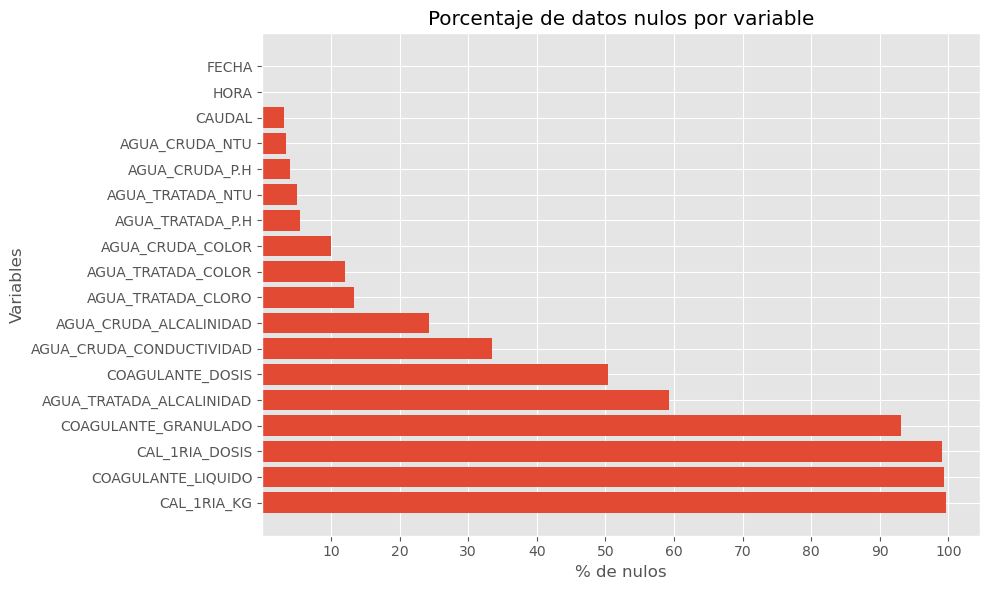

In [15]:
# gráfica de porcentaje de datos nulos por variable
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(nulos["Variables"], nulos["% de nulos"])
ax.set_xlabel("% de nulos")
ax.set_ylabel("Variables")
ax.set_title("Porcentaje de datos nulos por variable")
plt.xticks(range(10, 101, 10))
plt.tight_layout()
plt.show()

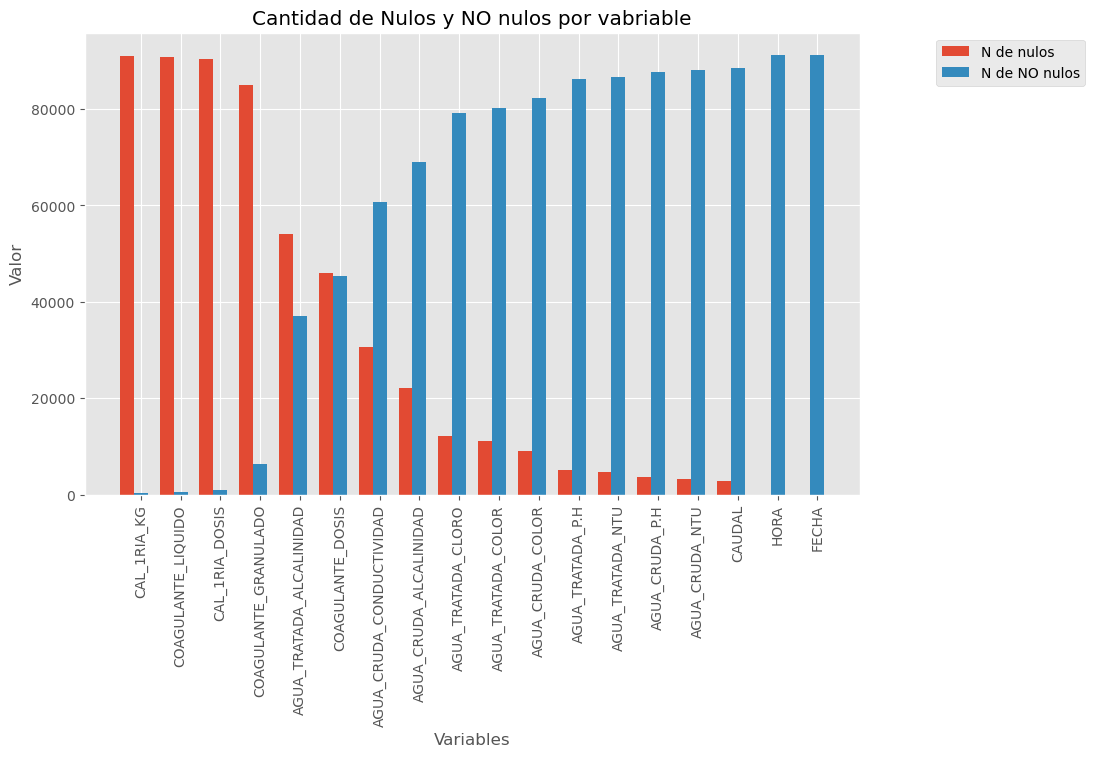

In [16]:
# Gráfica de cantidad de datos Nulos vs datos NO nulos por variable
fig, ax = plt.subplots(figsize=(10, 6))
n = len(nulos['Variables'])
x = np.arange(n)
width = 0.35
plt.bar(x - width, nulos["N de nulos"], width=width, label='N de nulos')
plt.bar(x, nulos["N de NO nulos"], width=width, label='N de NO nulos')
plt.xticks(x, nulos['Variables'],rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.set_xlabel("Variables")
ax.set_ylabel("Valor")
ax.set_title("Cantidad de Nulos y NO nulos por vabriable")
plt.show()


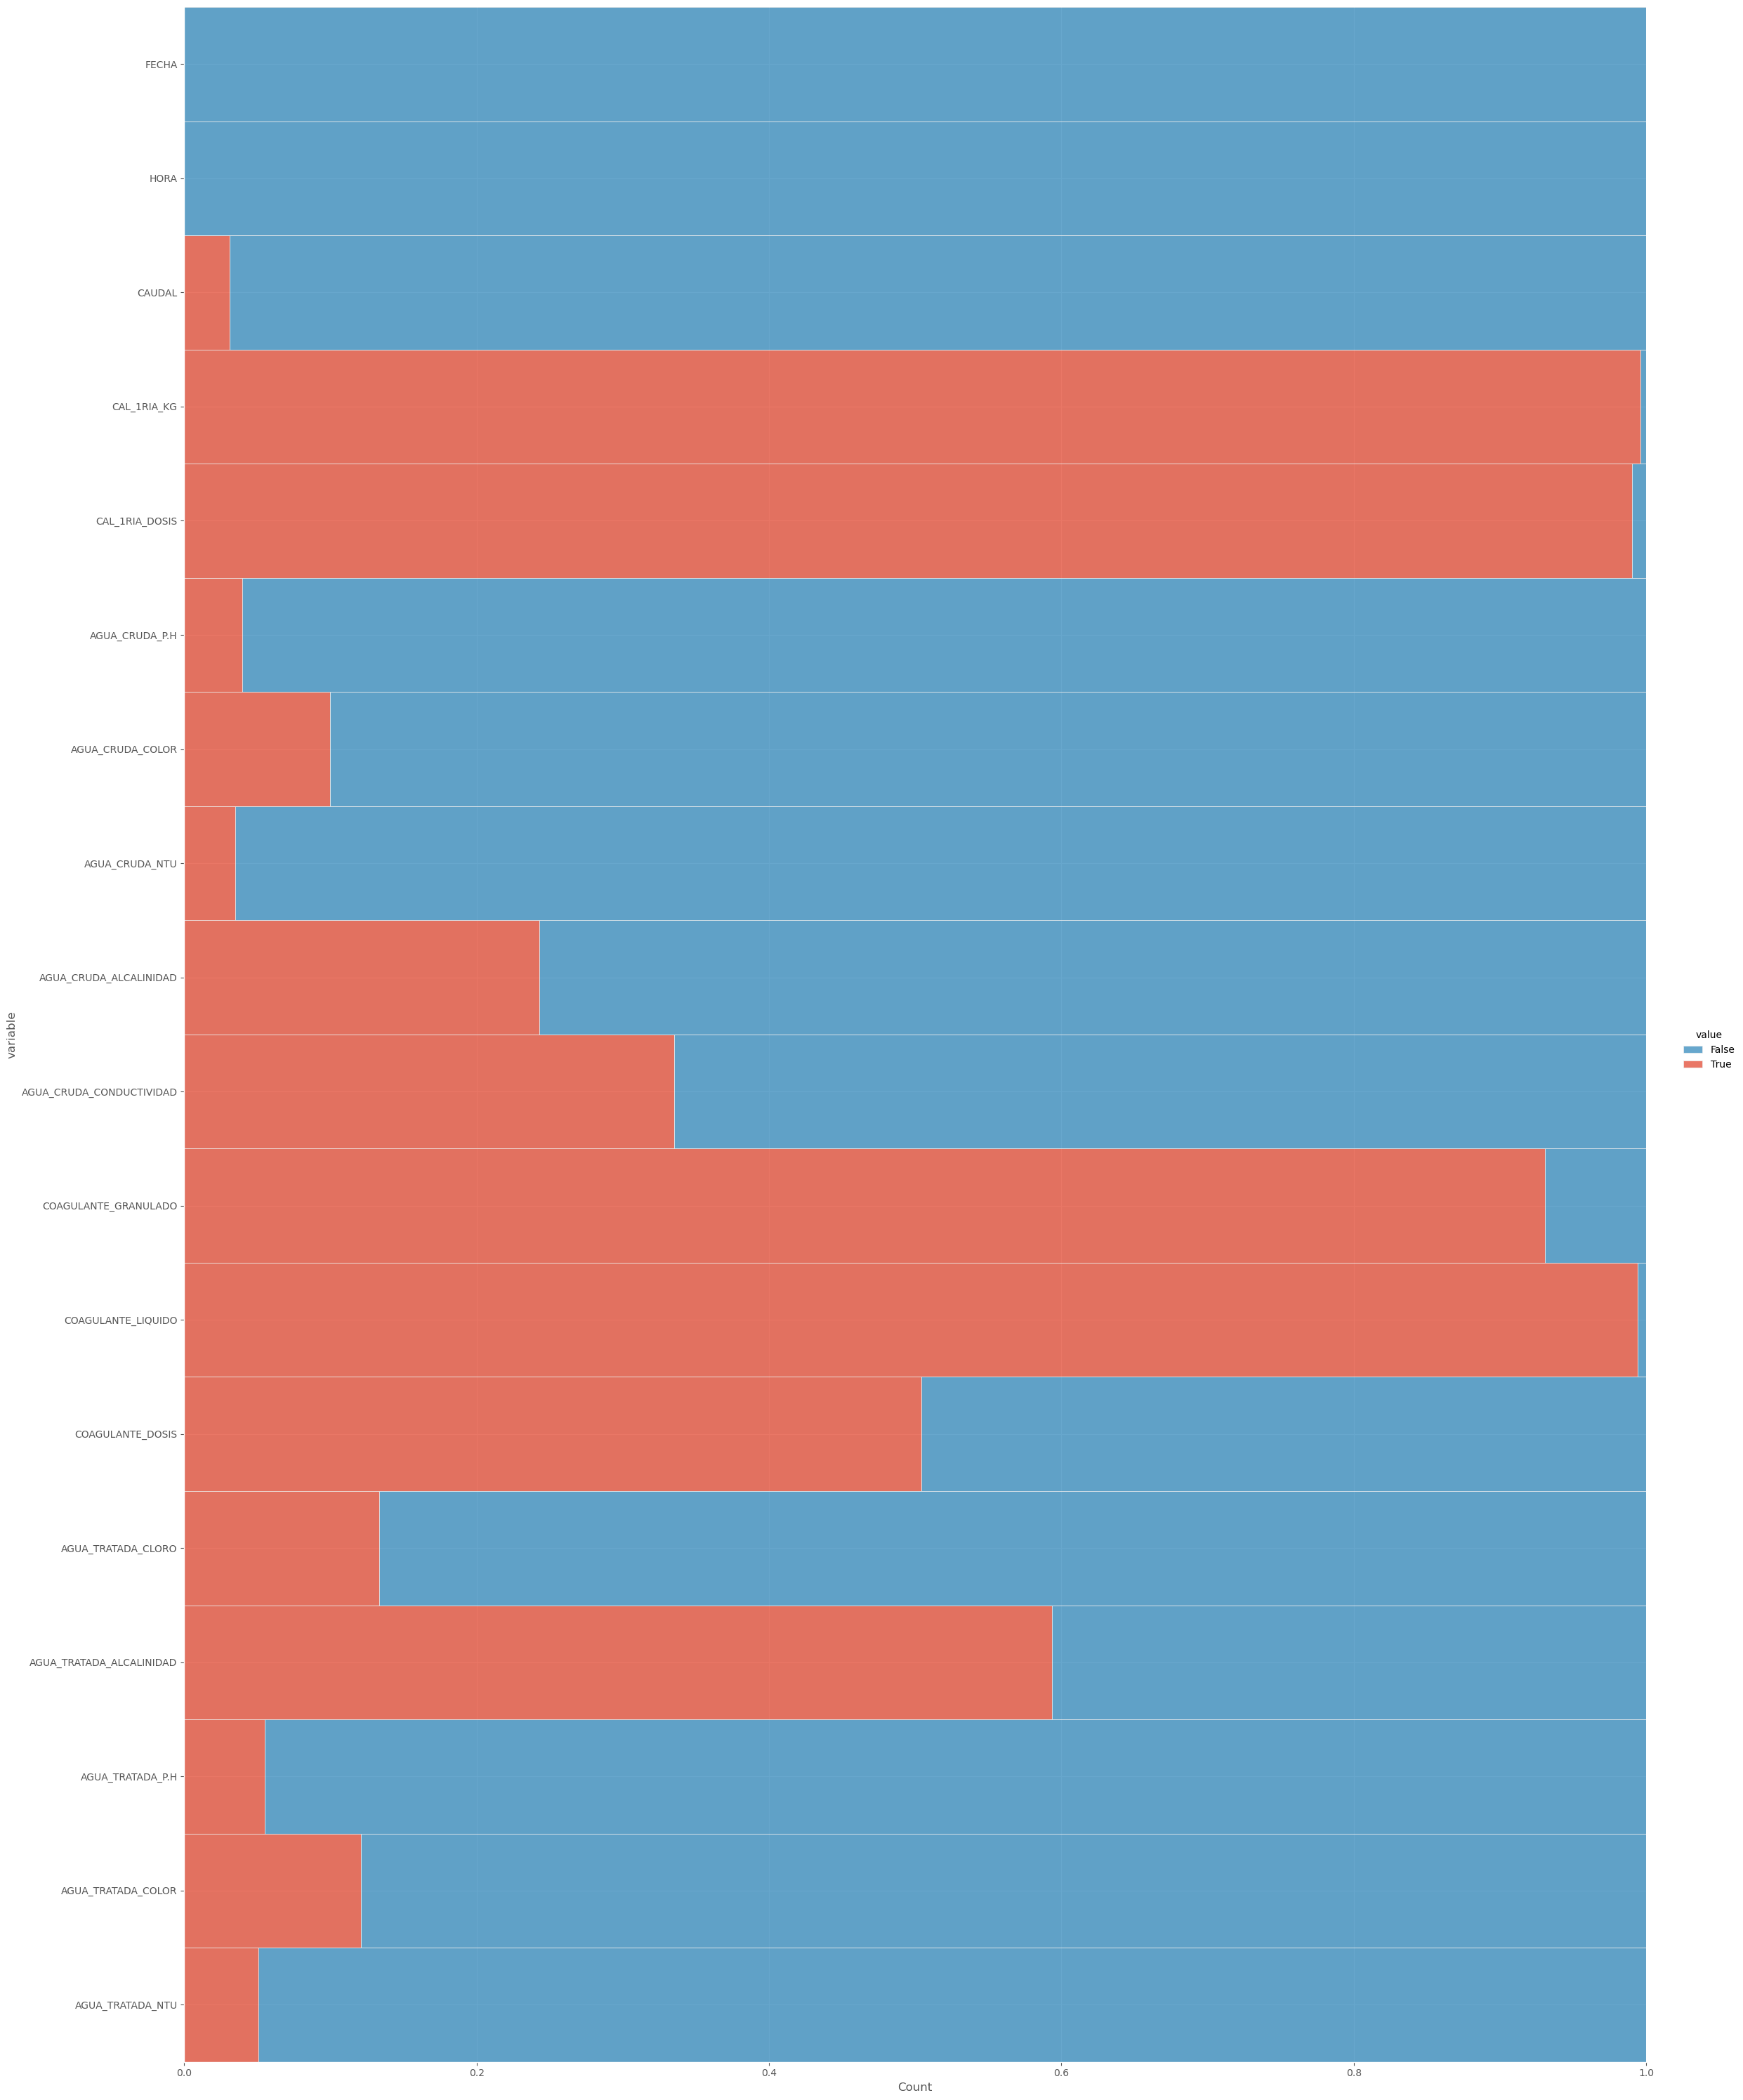

In [17]:
# Misma comparación con una visualización diferente
custom_palette = [ "#348abd","#e24a33"]
sns.set_palette(custom_palette)
df.isnull().melt().pipe(lambda df: (sns.displot(data=df,y='variable',hue='value',multiple='fill',height=30, aspect=8/10)))
plt.show()

**Distribución de datos nulos en todo el dataframe**

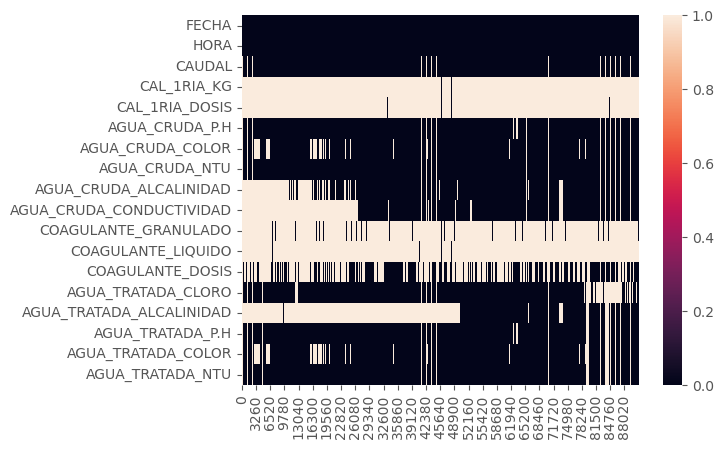

In [18]:
df.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))
plt.show()

Se realizó una observación de la cantidad de datos nulos de las variables en cada registro. Se encontró que en los primeros 51000 registros no se reportaron valores para la alcalinidad de agua tratada. Además, en los primeros 29000 registros, la información sobre la conductividad y la alcalinidad de agua cruda es escasa.

### Número de datos nulos por año

In [19]:
CONTEO_NULOS_AÑO = df.groupby(df['FECHA'].dt.year).apply(lambda x: x.isnull().sum())
CONTEO_NULOS_AÑO

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
FECHA,,,,,,,,,,,,,,,,,,
2013,0,0,159,9125,9125,200,2762,227,9125,9125,8657,9032,6276,211,9125,209,2778,224
2014,0,0,174,9120,9112,264,1911,249,7500,9125,8646,9091,5475,1046,9101,267,2396,283
2015,0,0,253,9124,9101,444,1208,408,2288,8386,8732,9073,6084,472,9125,406,1230,405
2016,0,0,291,9145,9103,335,354,307,352,511,8397,9148,3261,315,9150,311,354,327
2017,0,0,318,9100,9100,370,952,360,409,537,8472,9066,4196,331,9125,337,932,330
2018,0,0,58,8845,8846,58,107,60,86,601,8422,8825,5273,56,4651,56,107,56
2019,0,0,329,9100,9100,723,391,324,348,325,8669,9100,5884,340,350,735,383,325
2020,0,0,517,9150,9150,519,519,519,591,526,8458,9150,4151,546,587,517,517,517
2021,0,0,354,9105,8764,355,502,360,1122,1098,8282,9123,3142,2911,1840,1072,1211,1077


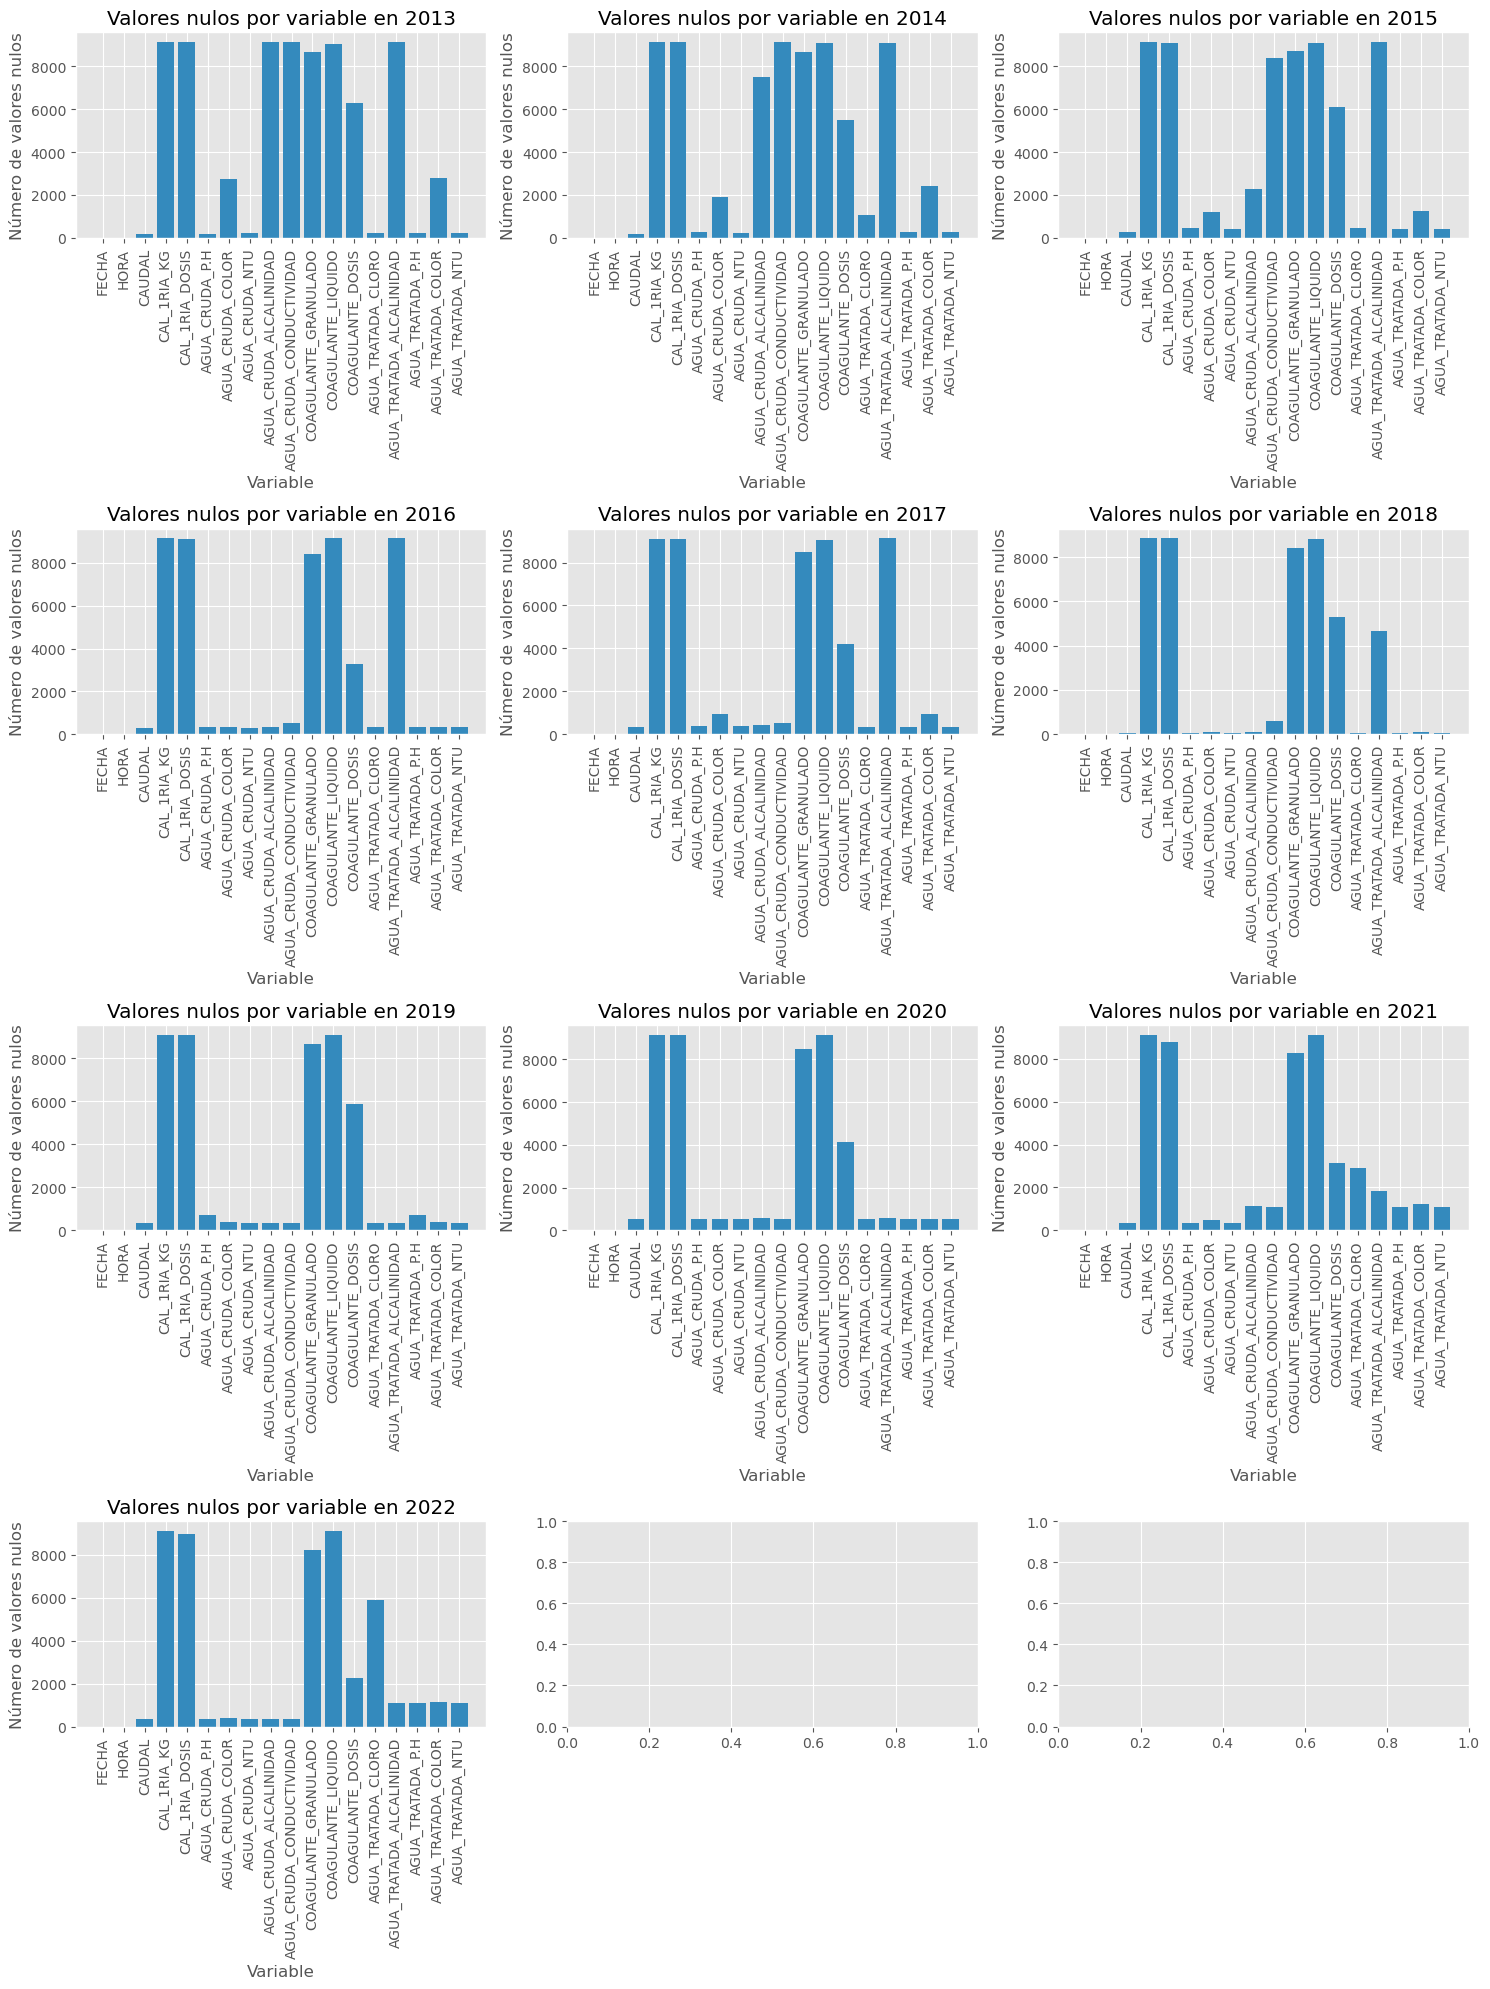

In [20]:
# Gráfica de datos nulos por año
nrows = 4
ncols = 3
num_subplots = len(CONTEO_NULOS_AÑO)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*5))
for i, año in enumerate(CONTEO_NULOS_AÑO.index):
    row = i // ncols
    col = i % ncols
    axes[row, col].bar(CONTEO_NULOS_AÑO.columns, CONTEO_NULOS_AÑO.loc[año])
    axes[row, col].set_title(f'Valores nulos por variable en {año}')
    axes[row, col].set_xlabel('Variable')
    axes[row, col].set_ylabel('Número de valores nulos')
    axes[row, col].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

Al examinar la cantidad de datos faltantes en la variable objetivo (COAGULANTE_DOSIS), con aproximadamente 9000 datos por año, se observa que los años 2016, 2020, 2021 y 2022 presentan la menor cantidad de datos nulos. A pesar de esto, es evidente que la proporción de datos faltantes en la variable sigue siendo considerable. Para obtener una visión más clara, se podría analizar la cantidad de datos nulos por meses en el año seleccionado.

### Tabla de número de datos nulos por mes

In [21]:
AÑO = 2013
fecha_col='FECHA'

In [22]:

def nulos_por_mes(dataframe):
    # Filtrar el dataframe por el año especificado
    df_anio = dataframe[dataframe[fecha_col].dt.year == AÑO]
    
    # Calcular la cantidad de datos nulos por mes
    nulos_por_mes = df_anio.isnull().groupby(df_anio[fecha_col].dt.month).sum()
    nulos_por_mes.index.name = 'Mes'
    nulos_por_mes.reset_index(inplace=True)
    
    return nulos_por_mes

In [23]:
CONTEO_NULOS_MES = nulos_por_mes(df)
CONTEO_NULOS_MES

,Mes,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
0,1,0,0,30,775,775,41,41,41,775,775,760,775,621,42,775,42,42,42
1,2,0,0,27,700,700,27,41,26,700,700,675,700,499,26,700,26,51,26
2,3,0,0,25,775,775,25,25,25,775,775,700,751,532,25,775,25,25,25
3,4,0,0,15,750,750,16,66,16,750,750,711,747,550,16,750,16,74,16
4,5,0,0,9,775,775,18,767,11,775,775,733,772,501,12,775,21,770,9
5,6,0,0,9,750,750,9,467,9,750,750,737,747,664,10,750,10,468,10
6,7,0,0,23,775,775,30,286,30,775,775,765,774,716,32,775,29,267,29
7,8,0,0,5,775,775,6,602,33,775,775,747,762,649,8,775,9,596,36
8,9,0,0,1,750,750,1,431,1,750,750,728,738,648,2,750,1,431,1
9,10,0,0,1,775,775,1,2,1,775,775,712,760,401,9,775,1,1,1


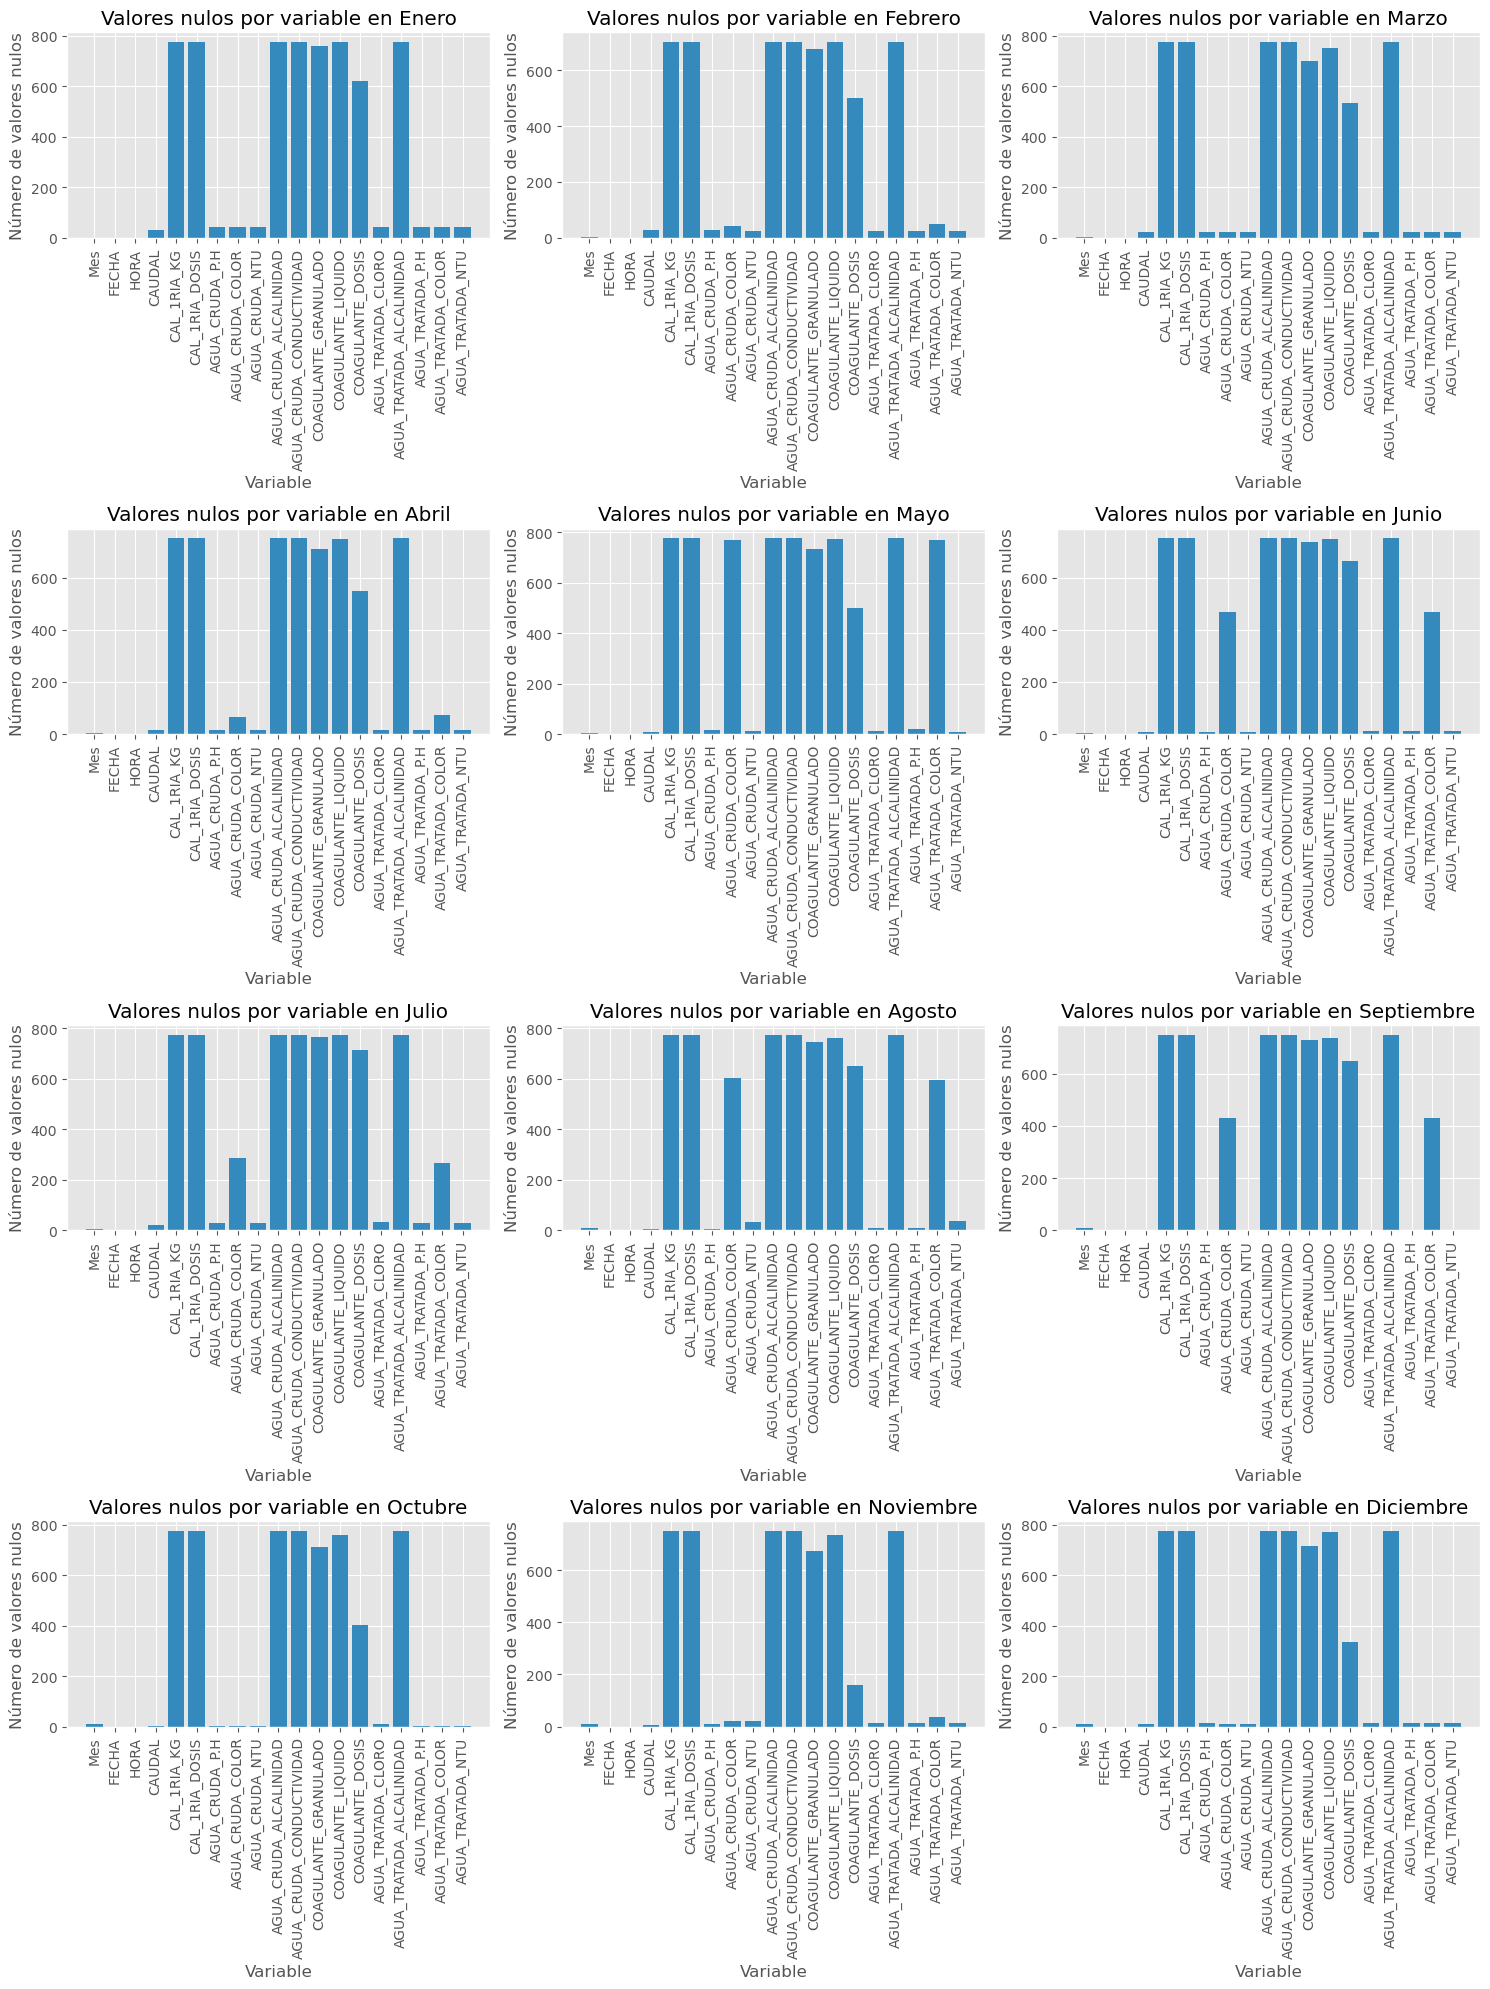

In [24]:
meses_es = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
nrows = 4
ncols = 3
num_subplots = len(CONTEO_NULOS_MES)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*5))

for i, mes in enumerate(CONTEO_NULOS_MES.index):
    row = i // ncols
    col = i % ncols
    mes_nombre = meses_es[mes]
    axes[row, col].bar(CONTEO_NULOS_MES.columns, CONTEO_NULOS_MES.loc[mes])
    axes[row, col].set_title(f'Valores nulos por variable en {mes_nombre}')
    axes[row, col].set_xlabel('Variable')
    axes[row, col].set_ylabel('Número de valores nulos')
    axes[row, col].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

In [25]:
def plot_timeline(df, date_column, value_column, start_year, end_year):
    # Filtrar el DataFrame por el rango de años especificado
    filtered_df = df[(df[date_column].dt.year >= start_year) & (df[date_column].dt.year <= end_year)]
    
    # Graficar la línea de tiempo para el rango de años especificado
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_df[date_column], filtered_df[value_column])
    plt.xlabel('Fecha')
    plt.ylabel('Dosis de coagulante')
    plt.title(f'Línea de tiempo de {start_year} a {end_year}')
    plt.show()

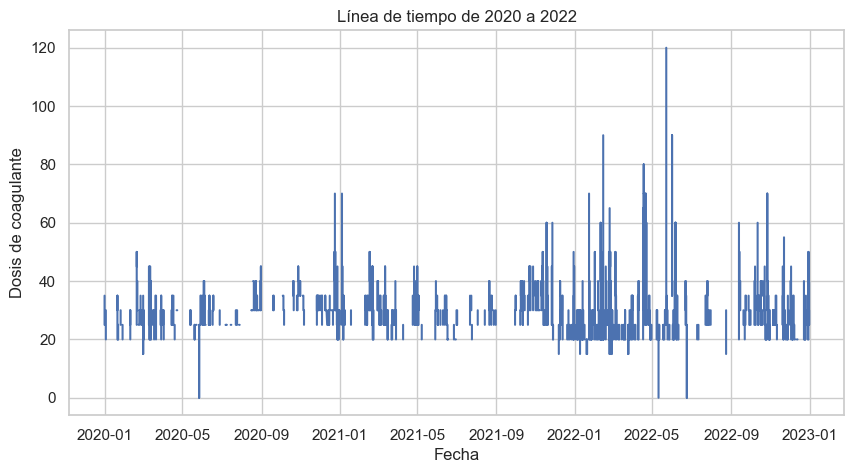

In [80]:
plot_timeline(df, 'FECHA', 'COAGULANTE_DOSIS', 2020, 2022)

Esta línea de tiempo ilustra las fluctuaciones en la dosis de coagulante a lo largo de los años, destacando en qué años se encuentran los valores máximos y mínimos. Además, permite visualizar la distribución de los datos faltantes a través de los años.

## Análisis de variables

### 1. Análisis Univariable (COAGULANTE_DOSIS)

In [27]:
# Resumen de estadística descriptiva:
df['COAGULANTE_DOSIS'].describe()

count    45261.000000
mean        25.945064
std          6.979151
min          0.000000
25%         20.000000
50%         25.000000
75%         30.000000
max        120.000000
Name: COAGULANTE_DOSIS, dtype: float64

A partir de la descripción estadística, se pueden observar varios aspectos sobre la dosis de coagulante:

- Count: Hay 45,261 datos válidos de dosis de coagulante en el conjunto de datos.

- Mean: El promedio de la dosis de coagulante es de 25.95. Esto indica que, en promedio, se utiliza alrededor de una dosis de 25.95 

- Std: La desviación estándar es de 6.98, lo que sugiere que hay una variabilidad moderada en las dosis de coagulante utilizadas.

Min: El valor mínimo de la dosis de coagulante es 0.

Percentiles: Los percentiles 25%, 50% (mediana) y 75% son 20, 25 y 30, respectivamente. Estos valores nos ayudan a comprender la distribución de las dosis de coagulante. La mediana es 25, lo que indica que el 50% de las observaciones tienen una dosis de coagulante de 25 o menos. Además, el 25% de las observaciones tienen una dosis de 20 o menos y el 75% de las observaciones tienen una dosis de 30 o menos.

Max: El valor máximo de la dosis de coagulante es 120, lo que indica que en algunos casos se utilizó una cantidad muy alta de coagulante.

En resumen, la dosis de coagulante tiene un promedio de 25.95 con una variabilidad moderada. La mayoría de las observaciones se encuentran entre 20 y 30 unidades, pero hay casos extremos en los que se utilizaron dosis muy altas o nulas de coagulante.

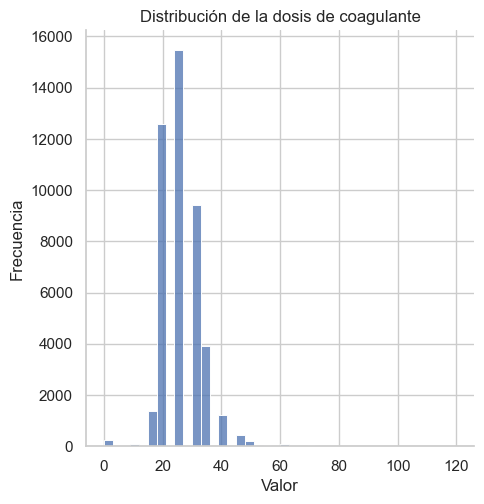

In [73]:
# Configurar Seaborn
sns.set(style="whitegrid")

# Crear displot
ax = sns.displot(df['COAGULANTE_DOSIS'], kde=False, binwidth=3)

# Configurar título y etiquetas
ax.set(title="Distribución de la dosis de coagulante", xlabel="Valor", ylabel="Frecuencia")

# Mostrar el gráfico
plt.show()

In [29]:
conteo = df['COAGULANTE_DOSIS'].value_counts()
conteo

25.00     15464
20.00     12573
30.00      9396
35.00      3900
15.00      1365
40.00      1215
45.00       434
0.00        256
50.00       210
10.00        88
60.00        78
55.00        42
70.00        32
23.00        27
29.00        14
33.00        12
16.00        12
90.00        12
65.00        11
28.00        11
120.00       10
27.00        10
42.00        10
80.00         9
36.76         9
32.00         7
22.00         7
43.00         5
38.00         5
12.00         5
44.00         4
26.00         4
47.00         3
48.00         3
18.00         2
21.00         2
41.00         2
85.00         1
36.00         1
110.00        1
31.00         1
15.70         1
3.00          1
35.10         1
15.80         1
15.40         1
16.70         1
37.00         1
17.00         1
Name: COAGULANTE_DOSIS, dtype: int64

In [30]:
df[df['COAGULANTE_DOSIS']==120]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
8953,2013-12-25,3,528.0,NaN,NaN,7.3,1517.0,1440.0,NaN,NaN,NaN,NaN,120.0,1.30,NaN,6.80,5.4,1.3
8954,2013-12-25,4,513.0,NaN,NaN,7.1,1117.0,1000.0,NaN,NaN,NaN,NaN,120.0,1.30,NaN,6.80,6.4,1.4
17671,2014-12-08,21,357.0,NaN,NaN,7.1,2954.0,2500.0,21.0,NaN,NaN,NaN,120.0,1.20,NaN,6.50,NaN,0.8
17672,2014-12-08,22,180.0,NaN,NaN,7.0,2954.0,2400.0,NaN,NaN,600.0,NaN,120.0,1.20,NaN,6.50,NaN,0.8
85719,2022-05-23,19,450.0,NaN,NaN,7.4,1760.0,1643.0,15.0,35.2,NaN,NaN,120.0,1.27,8.0,6.66,4.0,1.1
85720,2022-05-23,20,270.0,NaN,NaN,7.6,2542.0,2210.0,15.0,40.1,NaN,NaN,120.0,NaN,8.0,6.70,4.0,1.1
85721,2022-05-23,21,250.0,NaN,NaN,7.7,2156.0,1730.0,12.0,43.2,NaN,NaN,120.0,NaN,7.0,6.70,4.0,1.1
85722,2022-05-23,22,520.0,NaN,NaN,7.6,2100.0,1423.0,18.0,52.1,NaN,NaN,120.0,1.54,7.0,6.80,2.0,1.1
85723,2022-05-23,23,470.0,NaN,NaN,7.5,1932.0,1654.0,18.0,45.2,875.0,NaN,120.0,NaN,7.0,6.70,2.0,1.1
85724,2022-05-23,24,470.0,NaN,NaN,7.4,1623.0,1325.0,19.0,51.3,NaN,NaN,120.0,NaN,10.0,6.60,2.0,1.1


Valores como 120 de dosis de coagulante tienen valores muy altos de turbiedad y color

In [31]:
df[df['COAGULANTE_DOSIS']==36.76]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
2791,2013-04-22,16,700.0,NaN,NaN,7.4,33.0,8.3,NaN,NaN,NaN,NaN,36.76,1.3,NaN,6.5,2.5,1.0
2792,2013-04-22,17,685.0,NaN,NaN,7.4,33.0,8.3,NaN,NaN,NaN,NaN,36.76,1.3,NaN,6.5,2.5,1.0
2793,2013-04-22,18,542.0,NaN,NaN,7.1,25.0,8.2,NaN,NaN,NaN,NaN,36.76,1.2,NaN,6.8,3.2,1.3
2794,2013-04-22,19,577.0,NaN,NaN,7.1,32.0,15.0,NaN,NaN,NaN,NaN,36.76,1.2,NaN,6.8,3.2,1.3
2795,2013-04-22,20,570.0,NaN,NaN,7.1,32.0,15.0,NaN,NaN,NaN,NaN,36.76,1.2,NaN,6.8,3.2,1.3
2796,2013-04-22,21,541.0,NaN,NaN,7.1,32.0,15.0,NaN,NaN,NaN,NaN,36.76,1.2,NaN,6.8,3.2,1.3
2797,2013-04-22,22,524.0,NaN,NaN,7.1,32.0,15.0,NaN,NaN,NaN,NaN,36.76,1.2,NaN,6.8,3.2,1.3
2798,2013-04-22,23,533.0,NaN,NaN,7.1,46.3,21.2,NaN,NaN,NaN,NaN,36.76,1.4,NaN,6.8,3.3,0.3
2799,2013-04-22,24,536.0,NaN,NaN,7.1,46.3,21.2,NaN,NaN,725.0,NaN,36.76,1.4,NaN,6.8,3.3,0.3


In [32]:
# Asimetría y curtosis:
print("Skewness: %f" % df['COAGULANTE_DOSIS'].skew())
print("Kurtosis: %f" % df['COAGULANTE_DOSIS'].kurt())

Skewness: 1.617670
Kurtosis: 13.476525


Los valores de skewness (asimetría) y kurtosis son dos estadísticas que ayudan a describir la forma de una distribución de datos.

**Skewness (Asimetría):** Mide el grado de asimetría de una distribución. Un valor de skewness de 0 indica una distribución simétrica. Si la asimetría es positiva, como en este caso (1.617670), significa que la distribución está sesgada hacia la derecha, lo que indica que hay más valores en el extremo inferior del rango y la cola se extiende hacia valores más altos.

**Kurtosis:** Mide el "pico" o la concentración de valores en una distribución en comparación con la distribución normal. La kurtosis de una distribución normal es 3. Si la kurtosis es mayor que 3, como en este caso (13.476525), se dice que la distribución es leptocúrtica, lo que indica que tiene colas más pesadas y un pico más agudo que una distribución normal. Esto implica que hay más valores extremos (tanto altos como bajos) de lo que se esperaría en una distribución normal.

En resumen, la distribución de datos en este caso tiene una asimetría positiva, lo que indica un sesgo hacia la derecha, y una kurtosis alta, lo que indica colas más pesadas y un pico más agudo en comparación con una distribución normal. Estas dos estadísticas sugieren que la distribución de los datos se desvía de la normalidad.

**Relación con las demás variables**

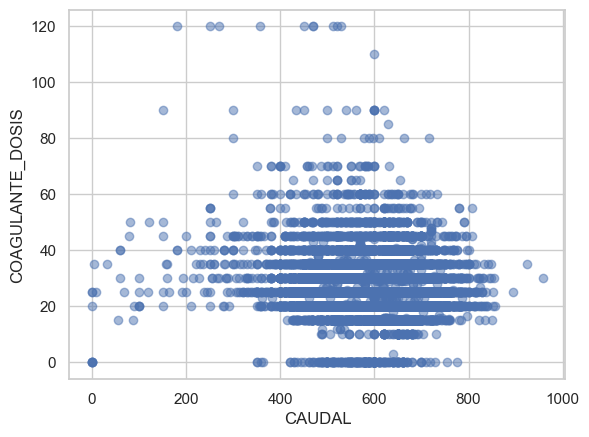

In [48]:
# Diagrama de dispersión CAUDAL/COAGULANTE_DOSIS:
plt.scatter(x=df['CAUDAL'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('CAUDAL')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

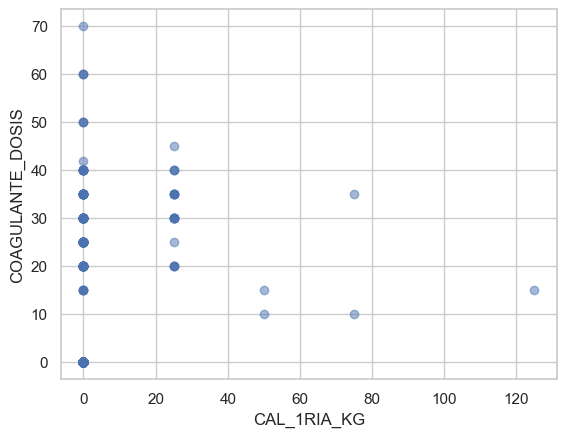

In [49]:
# Diagrama de dispersión CAL_1RIA_KG/COAGULANTE_DOSIS:
plt.scatter(x=df['CAL_1RIA_KG'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('CAL_1RIA_KG')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

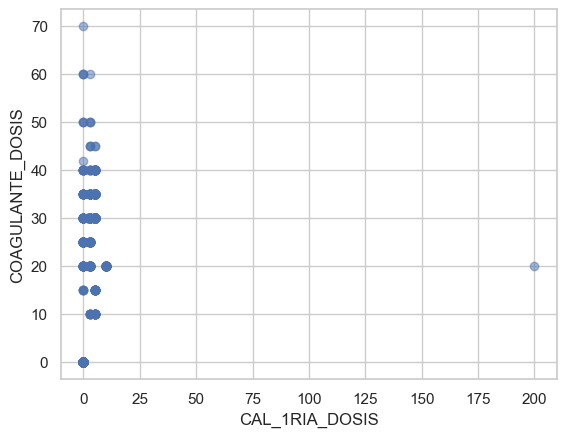

In [50]:
# Diagrama de dispersión CAL_1RIA_DOSIS/COAGULANTE_DOSIS:
plt.scatter(x=df['CAL_1RIA_DOSIS'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('CAL_1RIA_DOSIS')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

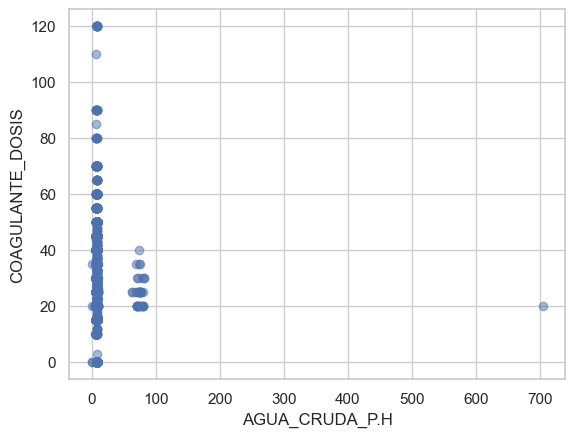

In [51]:
# Diagrama de dispersión AGUA_CRUDA_P.H/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_P.H'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_P.H')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

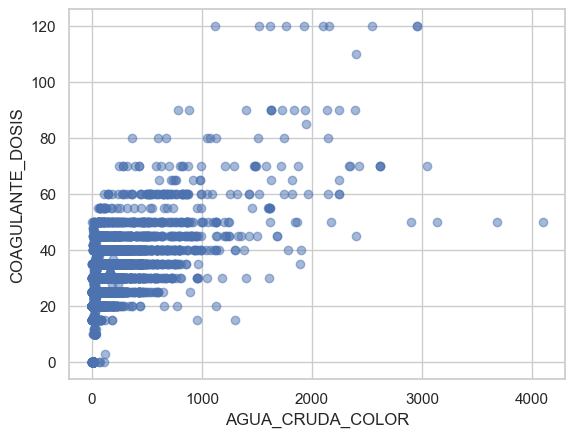

In [52]:
# Diagrama de dispersión AGUA_CRUDA_COLOR/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_COLOR'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_COLOR')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

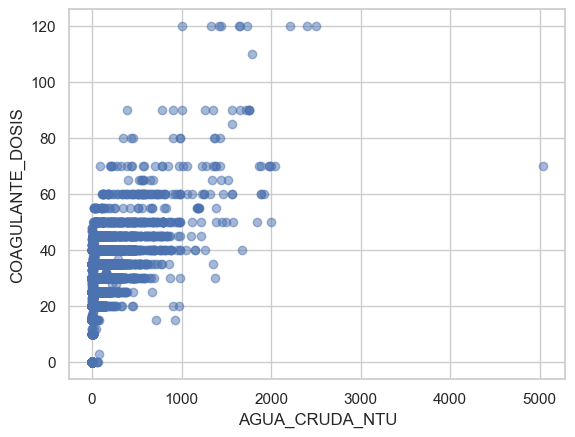

In [53]:
# Diagrama de dispersión AGUA_CRUDA_NTU/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_NTU'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_NTU')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

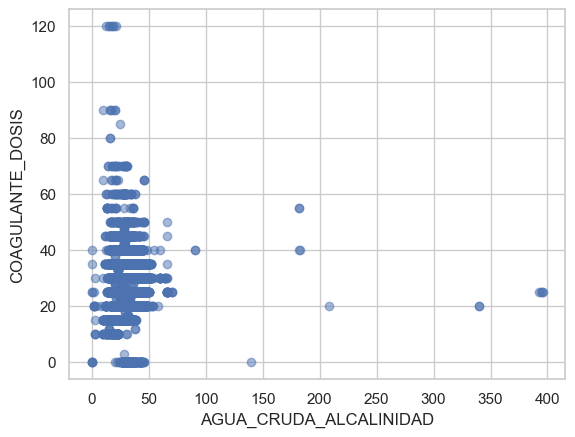

In [54]:
# Diagrama de dispersión AGUA_CRUDA_ALCALINIDAD/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_ALCALINIDAD'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_ALCALINIDAD')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

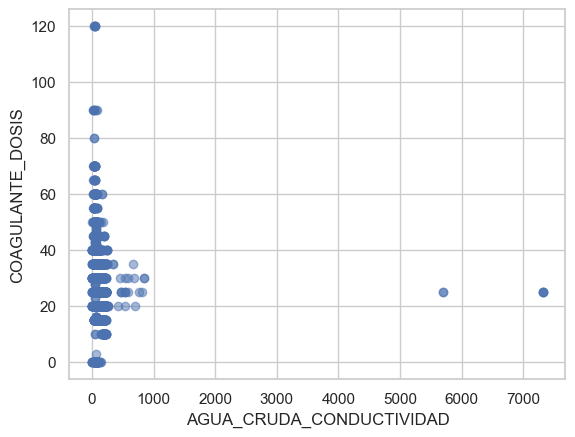

In [55]:
# Diagrama de dispersión AGUA_CRUDA_CONDUCTIVIDAD/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_CONDUCTIVIDAD'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_CONDUCTIVIDAD')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

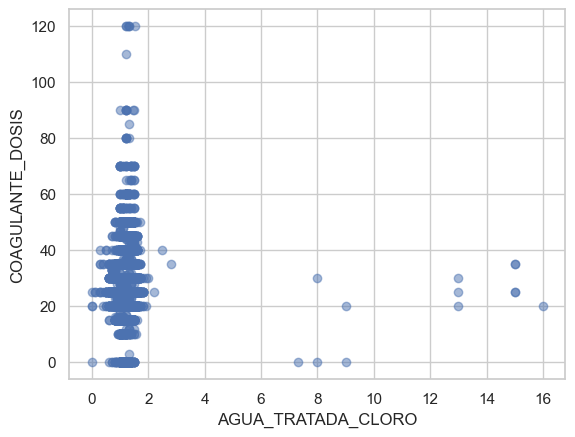

In [56]:
# Diagrama de dispersión AGUA_TRATADA_CLORO/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_TRATADA_CLORO'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_TRATADA_CLORO')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

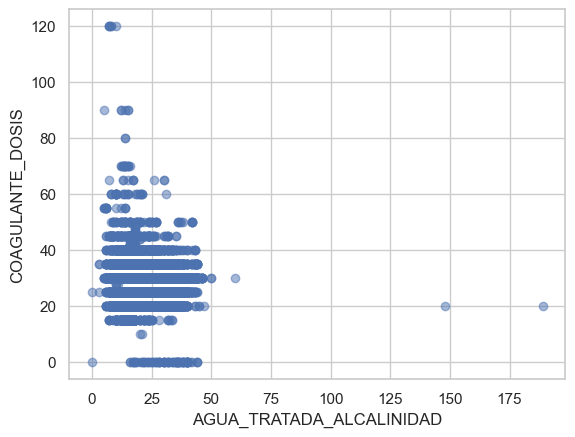

In [57]:
# Diagrama de dispersión AGUA_TRATADA_ALCALINIDAD/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_TRATADA_ALCALINIDAD'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_TRATADA_ALCALINIDAD')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

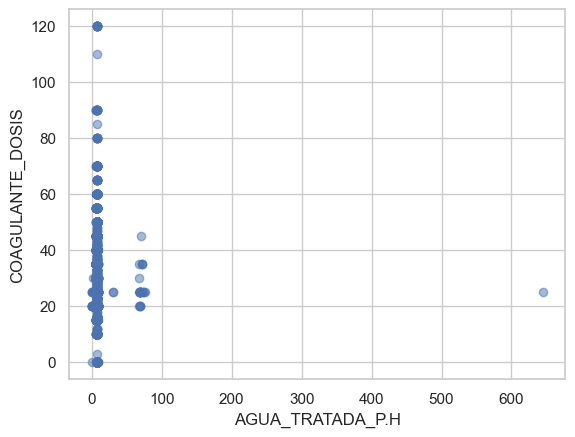

In [58]:
# Diagrama de dispersión AGUA_TRATADA_P.H/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_TRATADA_P.H'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_TRATADA_P.H')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

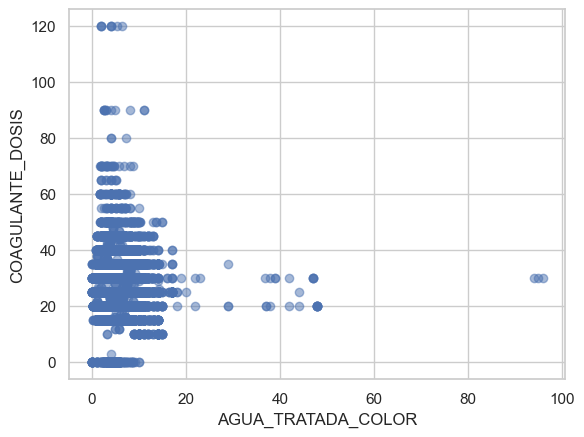

In [59]:
# Diagrama de dispersión AGUA_TRATADA_COLOR/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_TRATADA_COLOR'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_TRATADA_COLOR')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

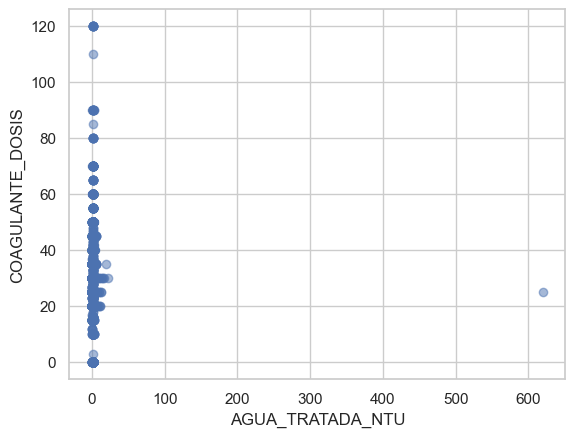

In [63]:
# Diagrama de dispersión AGUA_TRATADA_NTU/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_TRATADA_NTU'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_TRATADA_NTU')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

Al comparar la relación entre la dosis de coagulante y las demás variables, se observa una tendencia positiva en la relación con la turbiedad y el color del agua cruda. Esta tendencia se manifiesta en la forma en que los puntos se desplazan desde la parte inferior izquierda hacia la parte superior derecha. Sin embargo, debido a la dispersión de los puntos, la relación no parece ser muy fuerte.

En cuanto a los valores atípicos, se identificaron puntos que se desviaban significativamente del patrón general en casi todas las variables. Estos outliers pueden afectar la interpretación de la relación entre las variables y podrían requerir un análisis adicional.

### 2. Análisis Multivariable

**Matriz de correlación (en forma de mapa de calor)**

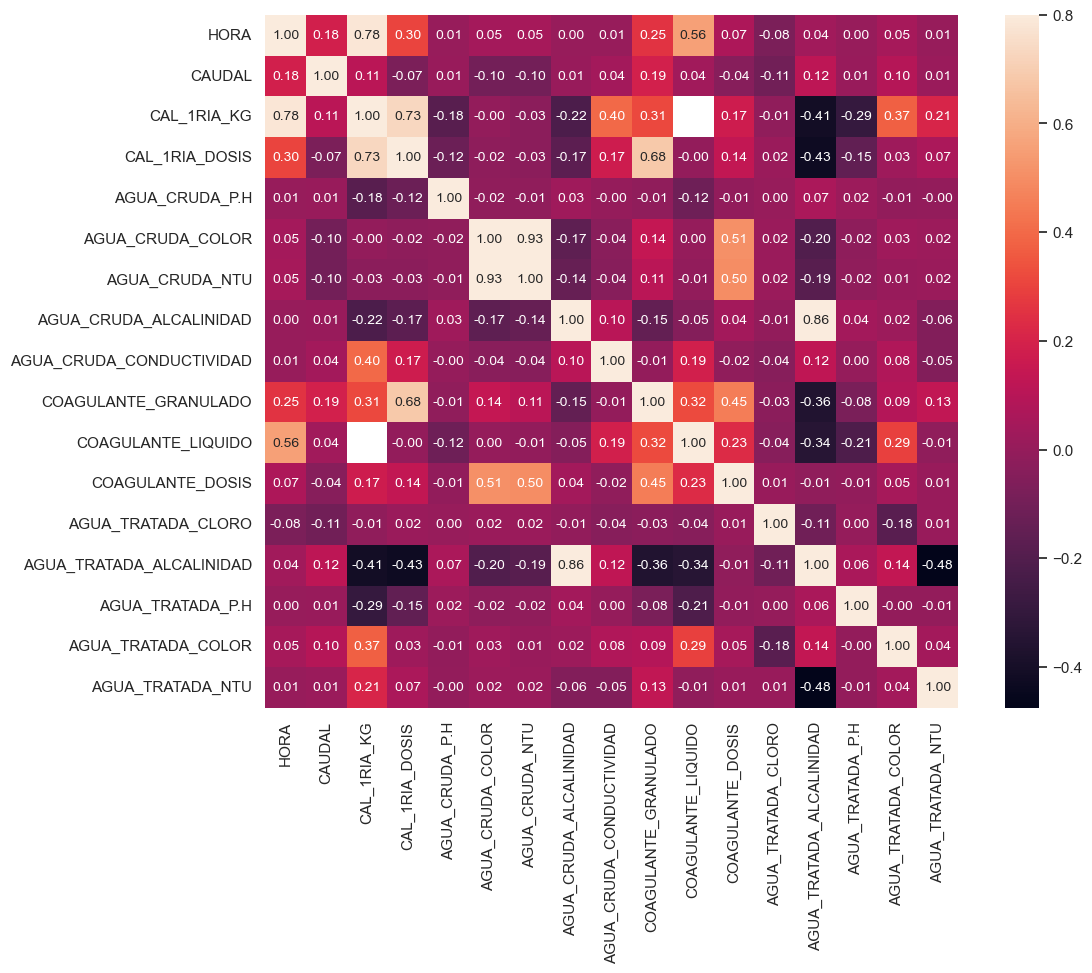

In [46]:
# Matriz de correlación:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

El mapa de calor es una forma visual muy útil para conocer las variables y sus relaciones. A primera vista hay dos variables que llaman la atención: `AGUA_CRUDA_COLOR` y `AGUA_CRUDA_NTU`. Parece haber una correlación significativa; en realidad es tan fuerte que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

**Matriz de correlación de COAGULANTE_DOSIS**

In [47]:
# Selecciona solo las columnas de tipo float en el DataFrame
df_float = df.select_dtypes(include=[float])

# Calcula la matriz de correlación
corr = df_float.corr()

# Selecciona las k columnas con mayor correlación con 'COAGULANTE_DOSIS'
# k = 16 # Número de variables.
# cols = corr.nlargest(k, 'COAGULANTE_DOSIS')['COAGULANTE_DOSIS'].index

# Selecciona las columnas relevantes en la matriz de correlación
corrmat = corr.loc[df_float.columns, ['COAGULANTE_DOSIS']]

# Ordena los valores de correlación y aplica un degradado de color
result = corrmat.sort_values(by='COAGULANTE_DOSIS', ascending=False).style.background_gradient()
result

,COAGULANTE_DOSIS
COAGULANTE_DOSIS,1.000000
AGUA_CRUDA_COLOR,0.508689
AGUA_CRUDA_NTU,0.500439
COAGULANTE_GRANULADO,0.454762
COAGULANTE_LIQUIDO,0.229741
CAL_1RIA_KG,0.170519
CAL_1RIA_DOSIS,0.136768
AGUA_TRATADA_COLOR,0.048331
AGUA_CRUDA_ALCALINIDAD,0.041443
AGUA_TRATADA_CLORO,0.010985


A partir de estos coeficientes de correlación, se puede extraer información sobre la relación lineal entre la dosis de coagulante y las demás variables:

- `AGUA_CRUDA_COLOR` (0.508689) y `AGUA_CRUDA_NTU` (0.500439) muestran una correlación positiva moderada con `COAGULANTE_DOSIS`. Esto sugiere que a medida que aumenta la dosis de coagulante, tanto el color como la turbiedad del agua cruda tienden a aumentar también.

- `COAGULANTE_GRANULADO` (0.454762) muestra una correlación positiva moderada con `COAGULANTE_DOSIS`. Esto indica que a medida que aumenta la dosis de coagulante, la cantidad de coagulante granulado también tiende a aumentar.

- `COAGULANTE_LIQUIDO` (0.229741), `CAL_1RIA_KG` (0.170519) y `CAL_1RIA_DOSIS` (0.136768) muestran correlaciones positivas débiles con `COAGULANTE_DOSIS`. Esto sugiere que hay una relación positiva entre estas variables y la dosis de coagulante, pero es más débil que las anteriores mencionadas.

- Las variables restantes tienen coeficientes de correlación cercanos a 0, lo que indica que no hay una relación lineal clara entre estas variables y la dosis de coagulante.

Es importante tener en cuenta que estos coeficientes de correlación solo miden la relación lineal entre las variables. Es posible que existan relaciones no lineales que no se reflejan en estos coeficientes. Además, la correlación no implica causalidad, por lo que no se puede concluir que un cambio en una variable cause directamente un cambio en la otra.